In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv(r"E:\data trained projects\Evaluation Projects\assignment 2\census_income.csv")

In [3]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
# check categorical column
for column in data.columns:
    if data[column].dtype==object:
        print(str(column)+ " : "+str(data[column].unique()))
        print(data[column].value_counts())
        print('-------------------------------------')

Workclass : [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
-------------------------------------
Education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Presc

In [8]:
data.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [9]:
#  ? is present in dataset and to deal with  ?' is replaced with the data is large in no instead of mode function
data['Workclass']=data['Workclass'].replace(' ?','Private')

In [10]:
data['Occupation']=data['Occupation'].replace(' ?','Prof-specialty')

In [11]:
data['Native_country']=data['Native_country'].replace(' ?','United-States')

In [12]:
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [13]:
# grouping of sub class into single class
data['Education']=data['Education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'school')

In [14]:
data['Education']=data['Education'].replace(['HS-grad','high school'])

In [15]:
data['Education']=data['Education'].replace(['Prof-school','Assoc-acdm','Assoc-voc','Some-college'],'higher')

In [16]:
data['Education']=data['Education'].replace('Bachelors','undergrad')

In [17]:
data['Education']=data['Education'].replace('Masters','grad')

In [18]:
data['Education']=data['Education'].replace('Doctorate','doc')

In [19]:
data['Marital_status']=data['Marital_status'].replace(['Married-civ-spouse','Married-AF-spouse'],'married')

In [20]:
data['Marital_status']=data['Marital_status'].replace(['Never-married','not married'])

In [21]:
data['Marital_status']=data['Marital_status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'other')

In [22]:
data['Income']=data['Income'].replace('<=50K','0')

In [23]:
data['Income']=data['Income'].replace('>50K','1')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


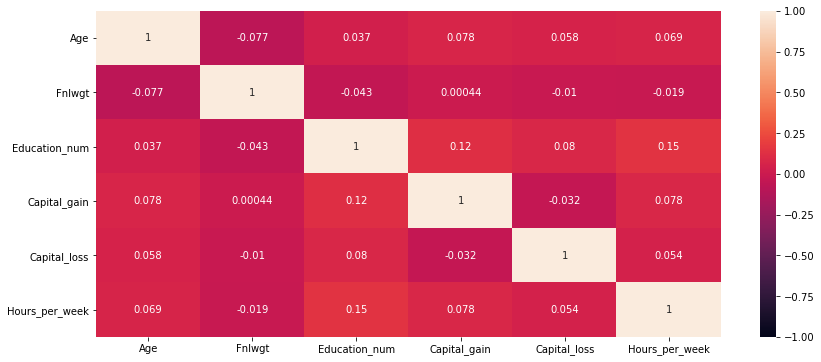

In [25]:
#correlation
plt.figure(figsize=(14,6))
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

<AxesSubplot:xlabel='Age'>

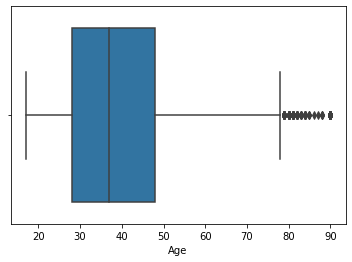

In [26]:
sns.boxplot(data['Age'])

<AxesSubplot:xlabel='Fnlwgt'>

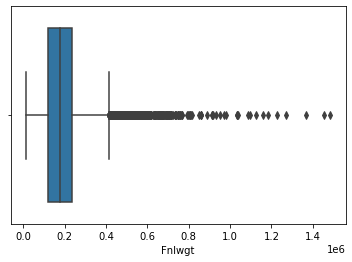

In [27]:
sns.boxplot(data['Fnlwgt'])

<AxesSubplot:xlabel='Education_num'>

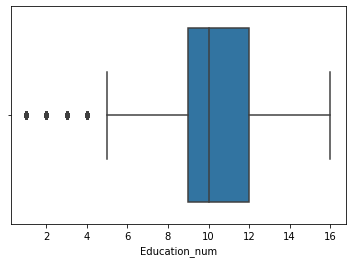

In [28]:
sns.boxplot(data['Education_num'])

<AxesSubplot:xlabel='Capital_gain'>

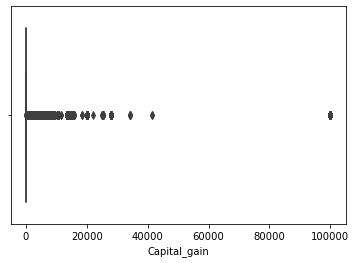

In [29]:
sns.boxplot(data['Capital_gain'])

<AxesSubplot:xlabel='Capital_loss'>

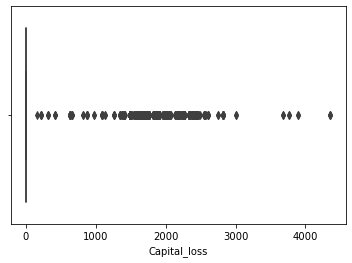

In [30]:
sns.boxplot(data['Capital_loss'])

<AxesSubplot:xlabel='Hours_per_week'>

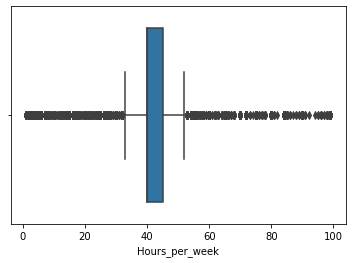

In [31]:
sns.boxplot(data['Hours_per_week'])

In [32]:
data.shape

(32560, 15)

In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [34]:
# removing of outlier
Q1=data['Hours_per_week'].quantile(.25)
Q3=data['Hours_per_week'].quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [35]:
data['Hours_per_week']=np.where(data['Hours_per_week']>upper_limit,upper_limit,
                              np.where(data['Hours_per_week']<lower_limit,
                                       lower_limit,
                              data['Hours_per_week'])
                             )

<AxesSubplot:xlabel='Hours_per_week'>

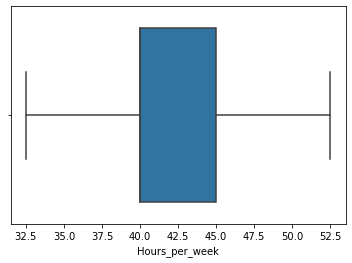

In [36]:
sns.boxplot(data['Hours_per_week'])

In [37]:
from scipy.stats import zscore
z_score=zscore(data[['Fnlwgt']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score < 2).all(axis=1)

data=data[filtering_entry]

<AxesSubplot:xlabel='Fnlwgt'>

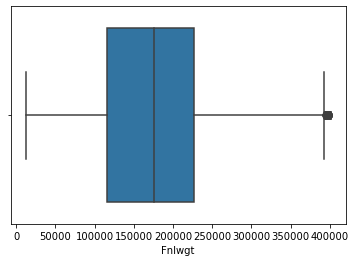

In [38]:
sns.boxplot(data['Fnlwgt'])

In [39]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [40]:
data=data.apply(LabelEncoder().fit_transform)
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,5,2925,9,12,2,3,0,4,1,0,0,0,38,0
1,21,3,14085,11,8,0,5,1,4,1,0,0,8,38,0
2,36,3,15335,1,6,2,5,0,2,1,0,0,8,38,0
3,11,3,19354,9,12,2,9,5,2,0,0,0,8,4,0
4,20,3,17699,12,13,2,3,5,4,0,0,0,8,38,0


In [41]:
x=data.drop(columns=['Income'],axis=1)
y=data['Income']

In [42]:
# traning of model
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=55)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr=LogisticRegression()

In [46]:
lr.fit(x_train,y_train)

LogisticRegression()

In [47]:
lr_pred=lr.predict(x_test)

In [48]:
# metrics evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report,plot_roc_curve

In [49]:
accuracy=accuracy_score(y_test,lr_pred)
accuracy

0.7892271662763466

In [50]:
lr_cross_score=cross_val_score(lr,x,y,cv=5,scoring='accuracy').mean()
lr_cross_score

0.8008365761145912

In [51]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      7105
           1       0.62      0.35      0.45      2289

    accuracy                           0.79      9394
   macro avg       0.72      0.64      0.66      9394
weighted avg       0.77      0.79      0.77      9394



In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn=KNeighborsClassifier()

In [54]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [55]:
knn_pred=knn.predict(x_test)

In [56]:
accuracy=accuracy_score(y_test,knn_pred)
accuracy

0.7718756653182882

In [57]:
knn_cross_score=cross_val_score(knn,x,y,cv=5,scoring='accuracy').mean()
knn_cross_score

0.7780333087312532

In [58]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      7105
           1       0.55      0.37      0.44      2289

    accuracy                           0.77      9394
   macro avg       0.68      0.64      0.65      9394
weighted avg       0.75      0.77      0.76      9394



In [59]:
from sklearn.svm import SVC

In [60]:
svc=SVC()

In [61]:
svc.fit(x_train,y_train)

SVC()

In [62]:
svc_pred=svc.predict(x_test)

In [63]:
accuracy=accuracy_score(y_test,svc_pred)
accuracy

0.7563338301043219

In [64]:
svc_cross_score=cross_val_score(svc,x,y,cv=5,scoring='accuracy').mean()
svc_cross_score

0.7580722419947155

In [65]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      7105
           1       0.00      0.00      0.00      2289

    accuracy                           0.76      9394
   macro avg       0.38      0.50      0.43      9394
weighted avg       0.57      0.76      0.65      9394



In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dt=DecisionTreeClassifier()

In [68]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
dt_pred=dt.predict(x_test)

In [70]:
accuracy=accuracy_score(y_test,dt_pred)
accuracy

0.8137108792846498

In [71]:
dt_cross_score=cross_val_score(dt,x,y,cv=5,scoring='accuracy').mean()
dt_cross_score

0.810481970098809

In [72]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7105
           1       0.62      0.62      0.62      2289

    accuracy                           0.81      9394
   macro avg       0.75      0.75      0.75      9394
weighted avg       0.81      0.81      0.81      9394



In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf=RandomForestClassifier()

In [75]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [76]:
rf_pred=rf.predict(x_test)

In [77]:
accuracy=accuracy_score(y_test,rf_pred)
accuracy

0.854907387694273

In [78]:
rf_cross_score=cross_val_score(rf,x,y,cv=5,scoring='accuracy').mean()
rf_cross_score

0.856057040448808

In [80]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7105
           1       0.74      0.63      0.68      2289

    accuracy                           0.85      9394
   macro avg       0.81      0.78      0.79      9394
weighted avg       0.85      0.85      0.85      9394



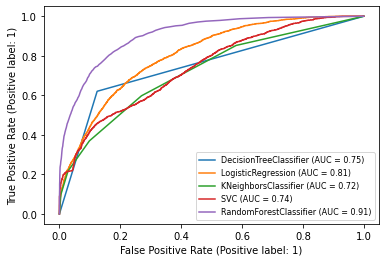

In [81]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':8},loc='lower right')
plt.show()

In [ ]:
# from the above analysis, random forest is the best algorithm as auc is of 91% for random forestS

In [82]:
# using Hypertunning parameter
rf=RandomForestClassifier()

params={'n_estimators':[13,15],
        'criterion':['entropy'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]}
grd=GridSearchCV(rf,param_grid=params,cv=5,n_jobs=-1)
grd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 15],
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

In [83]:
best_parameters=grd.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 15}


In [84]:
grd.best_score_

0.8596524124395681